# BigSkyEarth Training School Day 1

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab
import pandas as pd

## Load the SDSS galaxies dataset provided by Stefano.

Actually just a subset of the first 5 features (psf Magnitude).

In [2]:
df = pd.read_csv("data/galaxies_sdss.csv")

Filter the data.

In [3]:
df = df[(df["psfMag_u"] >= 0) & (df["psfMag_g"] >= 0)]

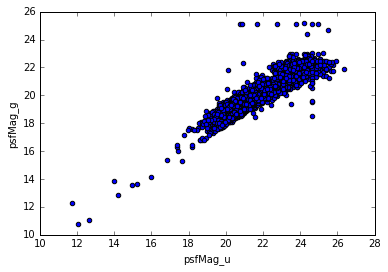

In [4]:
df.plot(kind="scatter", x="psfMag_u", y="psfMag_g")

In [5]:
df = df.set_index("objID")

In [6]:
df.head()

,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z
objID,,,,,
1237648674510995691,21.35560,19.96498,19.38107,19.12813,18.72835
1237648674510995704,20.85371,19.17773,18.38273,18.06475,17.67640
1237648674511847548,21.47003,20.11163,19.09579,18.55508,18.30263
1237648674512109722,20.05618,19.04180,18.51390,18.18192,18.07660
1237648674512109812,22.91436,20.95754,19.26978,18.76397,18.39173


In [7]:
from pandas.tools.plotting import scatter_matrix

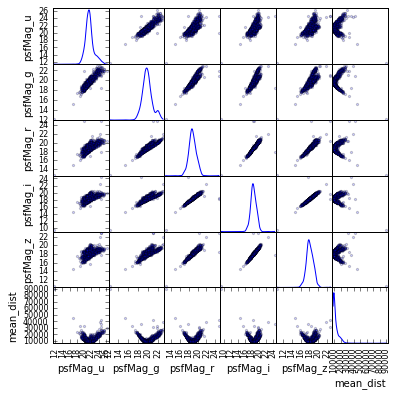

In [22]:
_ = scatter_matrix(df.sample(n=1000), alpha=0.2, figsize=(6, 6), diagonal="kde")

### compute similarities and distances

In [9]:
import sklearn.metrics.pairwise as pw

In [10]:
dist = pw.euclidean_distances(df.values)

In [11]:
dist.shape

(4967, 4967)

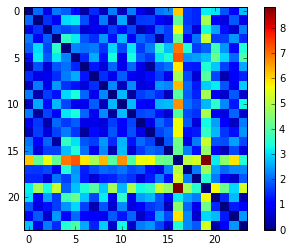

In [12]:
plt.imshow(dist[:24, :24], interpolation="nearest")
plt.colorbar()

### Outlier extraction

Try extracting based on integrating the similarity matrix.

In [13]:
df["mean_dist"] = dist.sum(axis=0)

In [14]:
df.head()

,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,mean_dist
objID,,,,,,
1237648674510995691,21.35560,19.96498,19.38107,19.12813,18.72835,10273.786257
1237648674510995704,20.85371,19.17773,18.38273,18.06475,17.67640,9722.959673
1237648674511847548,21.47003,20.11163,19.09579,18.55508,18.30263,9015.942022
1237648674512109722,20.05618,19.04180,18.51390,18.18192,18.07660,11561.415243
1237648674512109812,22.91436,20.95754,19.26978,18.76397,18.39173,12861.860921


/home/dl-processing03/miniconda3/envs/bse/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


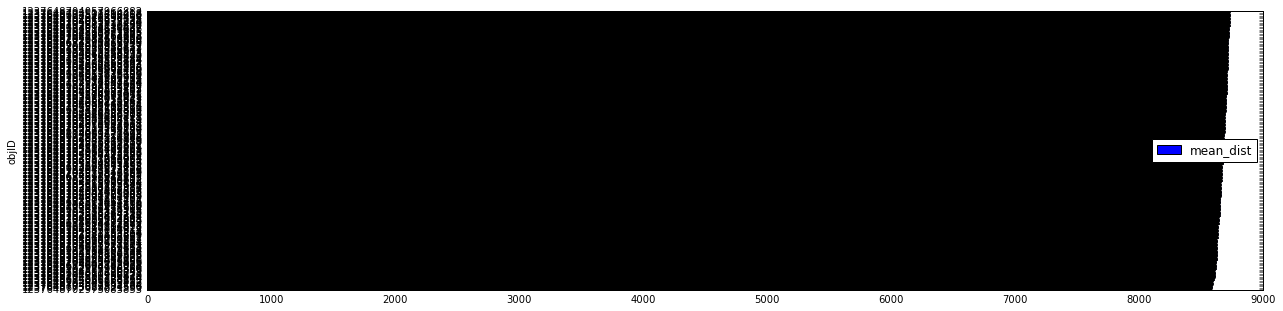

In [20]:
df.sort("mean_dist").head(200).plot(figsize=(20,5), kind="barh", y="mean_dist")

## Load dataset from Mahabel

Catalina transients.

In [16]:
df2 = pd.read_csv("data/crts_6obj.txt", sep=";")

In [17]:
df2.T

,0,1,2,3,4,5,6,7,8,9,...,1609,1610,1611,1612,1613,1614,1615,1616,1617,1618
name,CSS121123:051056-102401,CSS121123:045020-093113,CSS121120:020633+205707,CSS121114:093946+065210,CSS121114:011948-241624,CSS121112:211504-183405,CSS121025:180049+523235,CSS121014:224648+065635,CSS121011:225648-274325,CSS121010:174747+552918,...,1140039057770,1138037021075,1149031026922,1149029008905,1146030004847,1143029031660,1140030043857,1140008094351,1143008034458,1138006068090
ra,77.7324,72.5825,31.6393,144.942,19.9497,318.765,270.204,341.699,344.199,266.947,...,141.127,125.921,129.357,121.09,119.799,109.199,107.896,28.7328,29.0343,19.3643
dec,-10.4004,-9.52017,20.9521,6.86932,-24.2736,-18.568,52.5432,6.94295,-27.7237,55.4884,...,42.3047,37.4695,49.2689,48.3468,45.3269,43.3048,40.7769,42.2157,43.2915,38.9503
amplitude,0.895,0.75,2.375,1.4957,0.281392,0.603089,2.065,1.88,1.04,2.28,...,1.53,1.255,0.41,0.515,0.49,0.455,0.865,0.605,0.5,1.01
beyond1std,0.375,0.285714,0.276515,0.5,0.444444,0.285714,0.346154,0.12987,0.142857,0.135135,...,0.164634,0.085227,0.401961,0.229249,0.334507,0.384848,0.331288,0.363636,0.344086,0.189655
fpr_mid20,0.87482,0.085782,0.139132,0.283271,0.615585,0.326438,0.117387,0.023908,0.066766,0.119297,...,0.19958,0.234179,0.241194,0.122812,0.19634,0.281473,0.069333,0.19694,0.228382,0.103655
fpr_mid35,0.907977,0.408489,0.233547,0.434345,0.822992,0.554474,0.149157,0.045316,0.111968,0.207157,...,0.339508,0.354745,0.418355,0.2303,0.361901,0.444748,0.148757,0.316403,0.384193,0.142585
fpr_mid50,0.933366,0.629794,0.34222,0.643386,0.903259,0.648174,0.180537,0.06965,0.158522,0.324726,...,0.522124,0.455707,0.582392,0.382517,0.487339,0.591767,0.410545,0.488226,0.547543,0.389048
fpr_mid65,0.95021,0.736414,0.494447,0.890856,0.92025,0.741874,0.245944,0.096428,0.272789,0.405019,...,0.631676,0.597927,0.722426,0.468554,0.617224,0.731931,0.583374,0.658157,0.70484,0.520275
fpr_mid80,0.977077,0.870485,0.689385,0.968692,0.954385,0.893837,0.945981,0.139899,0.312805,0.66348,...,0.835367,0.782606,0.856438,0.574217,0.770417,0.872216,0.886687,0.821109,0.863343,0.899933
